In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def gaussian_glow(x0, y0, sigma_x, sigma_y, scene_size=128):
    """
    Returns glow in region 
    """
    xrange = 2 * sigma_x
    yrange = 2 * sigma_y
    xmin = max(1, x0 - xrange)
    xmax = min(scene_size - 1, x0 + xrange)
    ymin = max(1, y0 - yrange)
    ymax = min(scene_size - 1, y0 + yrange)
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-((X - x0)**2 / (2 * sigma_x**2) + (Y - y0)**2 / (2 * sigma_y**2)))
    return X.astype(np.int64), Y.astype(np.int64), Z


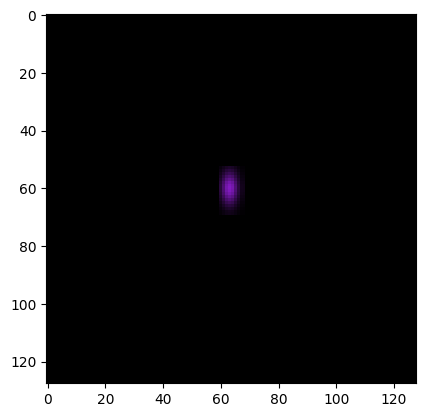

In [192]:
scene_size = 128
scene = np.zeros((scene_size, scene_size, 4))
n_fireflies = np.random.randint(1, 4)
firefly_locs = np.random.randint(0, scene_size, (n_fireflies, 2))
firefly_sizes = np.random.randint(2, 5, (n_fireflies, 2))
colors = np.random.rand(n_fireflies, 3)

glows = [gaussian_glow(*loc, *size) for loc, size in zip(firefly_locs, firefly_sizes)]

for i, glow in enumerate(glows):
    X, Y, Z = glow
    scene[X, Y, -1] += Z
    scene[X, Y, :3] = colors[i]

scene = np.clip(scene, 0, 1)
ax = plt.subplot()
ax.set_facecolor("black")
ax.imshow(scene, cmap='hot', interpolation='nearest')